In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./Walmart_Sales.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.shape

(6435, 8)

In [5]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


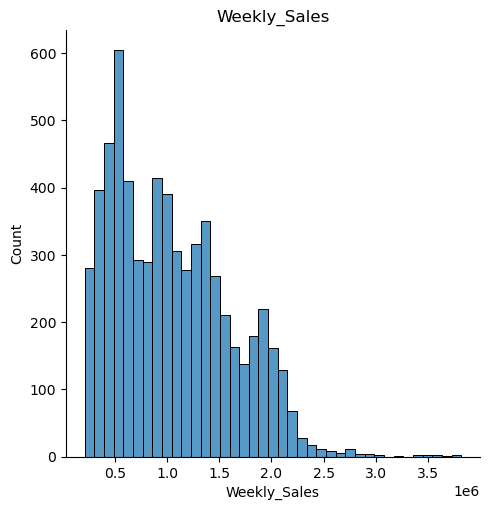

In [77]:
sns.displot(data['Weekly_Sales'])
plt.title('Weekly_Sales')
plt.show()

In [81]:
data.describe().T.style.background_gradient(cmap='plasma')

,count,mean,min,25%,50%,75%,max,std
Store,6435.000000,23.000000,1.000000,12.000000,23.000000,34.000000,45.000000,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,nan
Weekly_Sales,6435.000000,1046964.877562,209986.250000,553350.105000,960746.040000,1420158.660000,3818686.450000,564366.622054
Holiday_Flag,6435.000000,0.069930,0.000000,0.000000,0.000000,0.000000,1.000000,0.255049
Temperature,6435.000000,60.663782,-2.060000,47.460000,62.670000,74.940000,100.140000,18.444933
Fuel_Price,6435.000000,3.358607,2.472000,2.933000,3.445000,3.735000,4.468000,0.459020
CPI,6435.000000,171.578394,126.064000,131.735000,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.000000,7.999151,3.879000,6.891000,7.874000,8.622000,14.313000,1.875885


In [9]:
x=data['Store'].unique()
y=data.groupby('Store')['Weekly_Sales'].sum()

In [10]:
y

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\3971522183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x,y=y,palette='muted')


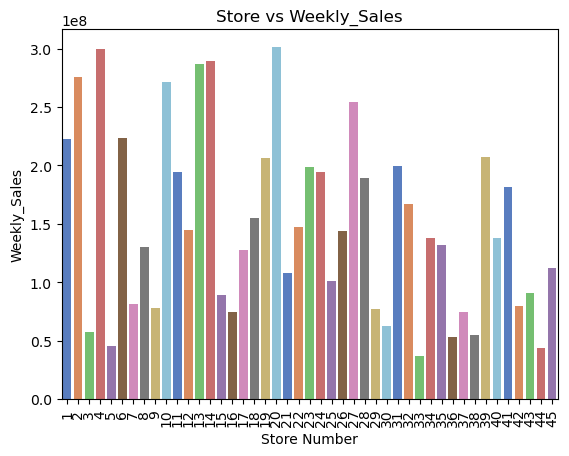

In [11]:
sns.barplot(x=x,y=y,palette='muted')
plt.xticks(rotation=90)
plt.title('Store vs Weekly_Sales')
plt.xlabel('Store Number')
plt.show()

In [12]:
data['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [13]:

df=data.groupby('Holiday_Flag')['Weekly_Sales'].sum()
df

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

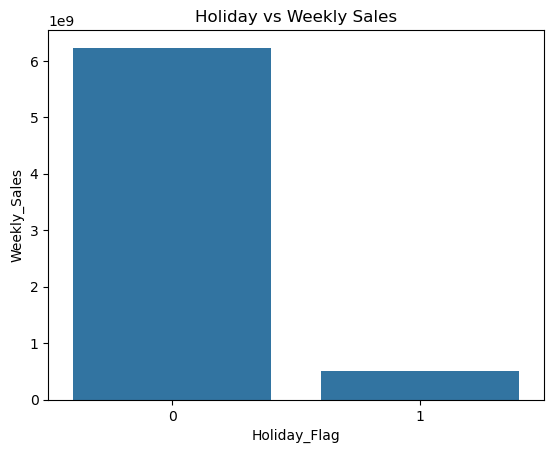

In [14]:
sns.barplot(df)
plt.title('Holiday vs Weekly Sales')
plt.show()

In [15]:
data['Date']=pd.to_datetime(data['Date'],format="%d-%m-%Y")

In [16]:
year=data['Date'].dt.year
year_sales=data.groupby(year)['Weekly_Sales'].sum()

In [17]:
year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Date, Length: 6435, dtype: int32

In [18]:
year_sales

Date
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\456657128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(year_sales,palette='colorblind')


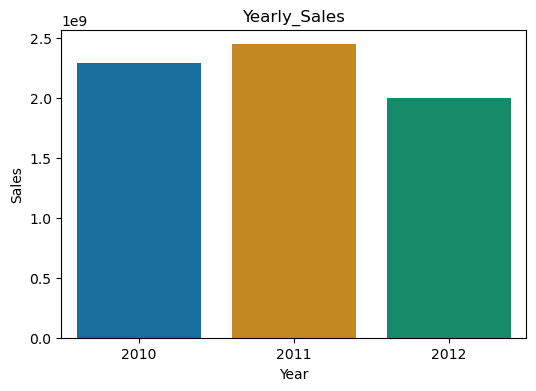

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(year_sales,palette='colorblind')
plt.title('Yearly_Sales')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

In [20]:
yearly_fuel=data.groupby(year)['Fuel_Price'].sum()

In [21]:
yearly_fuel

Date
2010    6099.337
2011    8334.881
2012    7178.417
Name: Fuel_Price, dtype: float64

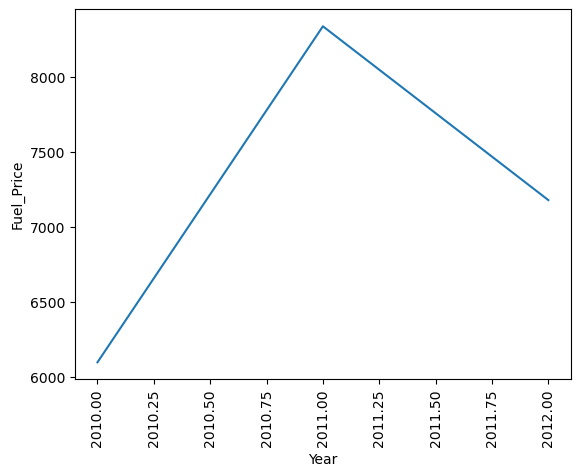

In [44]:
sns.lineplot(yearly_fuel)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()

In [23]:
unemploy=data.groupby(year)['Unemployment'].mean()

In [24]:
unemploy

Date
2010    8.492714
2011    8.082036
2012    7.347964
Name: Unemployment, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\2706334861.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(unemploy,palette='deep')


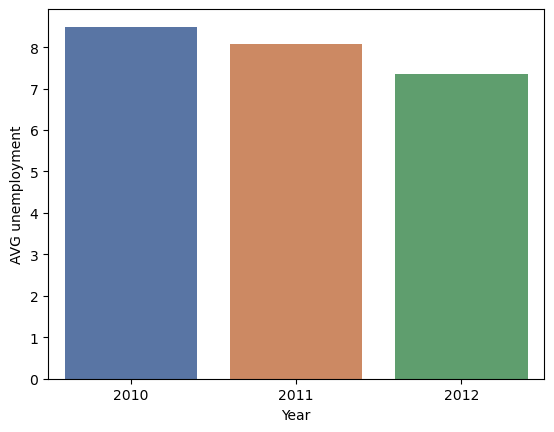

In [43]:
sns.barplot(unemploy,palette='deep')
plt.xlabel('Year')
plt.ylabel('AVG unemployment')
plt.show()

In [26]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [28]:
data['Temperature'].describe()

count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
max       100.140000
Name: Temperature, dtype: float64

In [31]:
months=data['Date'].dt.month

In [36]:
monthly_sales=data.groupby(months)['Weekly_Sales'].mean()

In [37]:
monthly_sales

Date
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\46795817.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(monthly_sales,palette='deep')


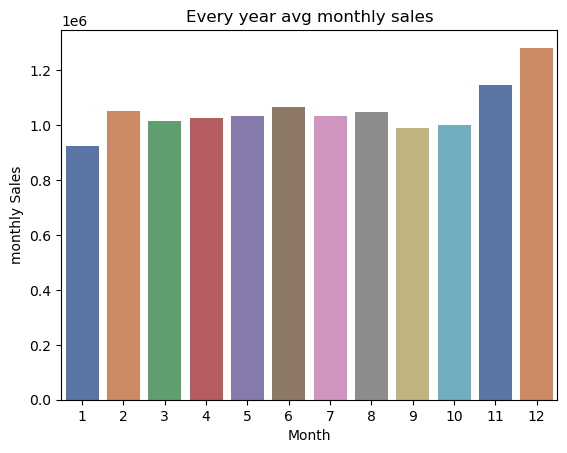

In [58]:
sns.barplot(monthly_sales,palette='deep')
plt.xlabel('Month')
plt.ylabel('monthly Sales')
plt.title('Every year avg monthly sales')
plt.show()

In [59]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [56]:
temp=data.groupby(months)['Temperature'].mean()

In [57]:
temp

Date
1     37.605028
2     38.900907
3     49.821983
4     57.614556
5     65.461574
6     75.208103
7     79.744032
8     79.273812
9     72.416085
10    61.561709
11    49.905778
12    40.180244
Name: Temperature, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\178156422.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(temp,palette='colorblind')


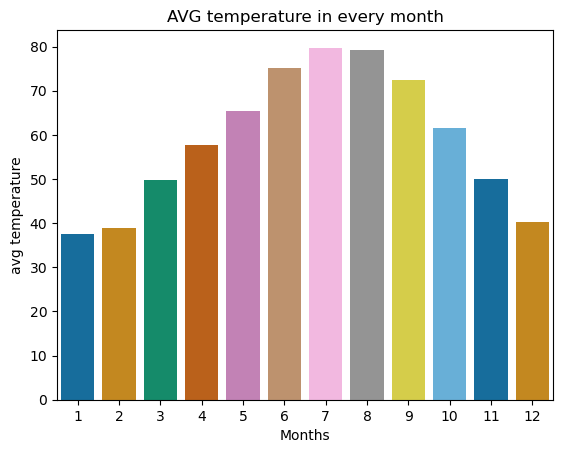

In [61]:
sns.barplot(temp,palette='colorblind')
plt.xlabel('Months')
plt.ylabel('avg temperature')
plt.title('AVG temperature in every month')
plt.show()

In [64]:
cpi_yearly =data.groupby(year)['CPI'].mean()
cpi_monthly=data.groupby(months)['CPI'].mean()

In [63]:
cpi_yearly

Date
2010    168.101782
2011    171.545716
2012    175.498781
Name: CPI, dtype: float64

In [65]:
cpi_monthly


Date
1     171.529737
2     170.680948
3     171.440512
4     171.098770
5     171.544731
6     171.918828
7     171.467112
8     172.254021
9     172.233242
10    172.334662
11    170.929984
12    171.104562
Name: CPI, dtype: float64

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\2177421941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cpi_monthly.index,y=cpi_monthly.values,palette='deep')


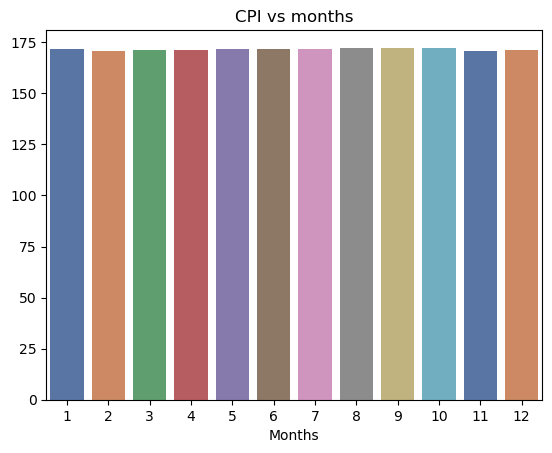

In [89]:
sns.barplot(x=cpi_monthly.index,y=cpi_monthly.values,palette='deep')
plt.xlabel('Months')
plt.title('CPI vs months')
plt.show()

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_21672\4059251952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cpi_yearly.index,y=cpi_yearly,palette='muted')


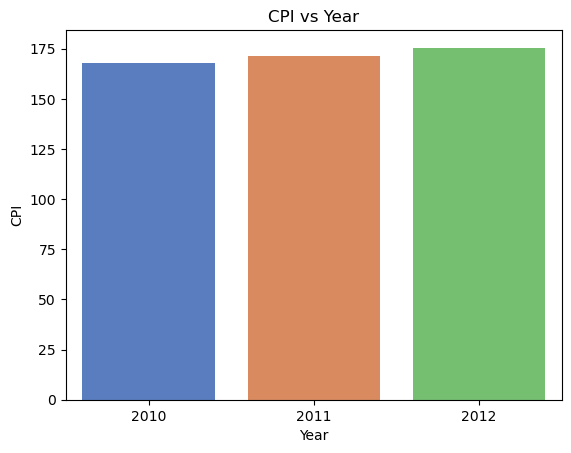

In [88]:

sns.barplot(x=cpi_yearly.index,y=cpi_yearly,palette='muted')
plt.xlabel('Year')
plt.title('CPI vs Year')
plt.show()

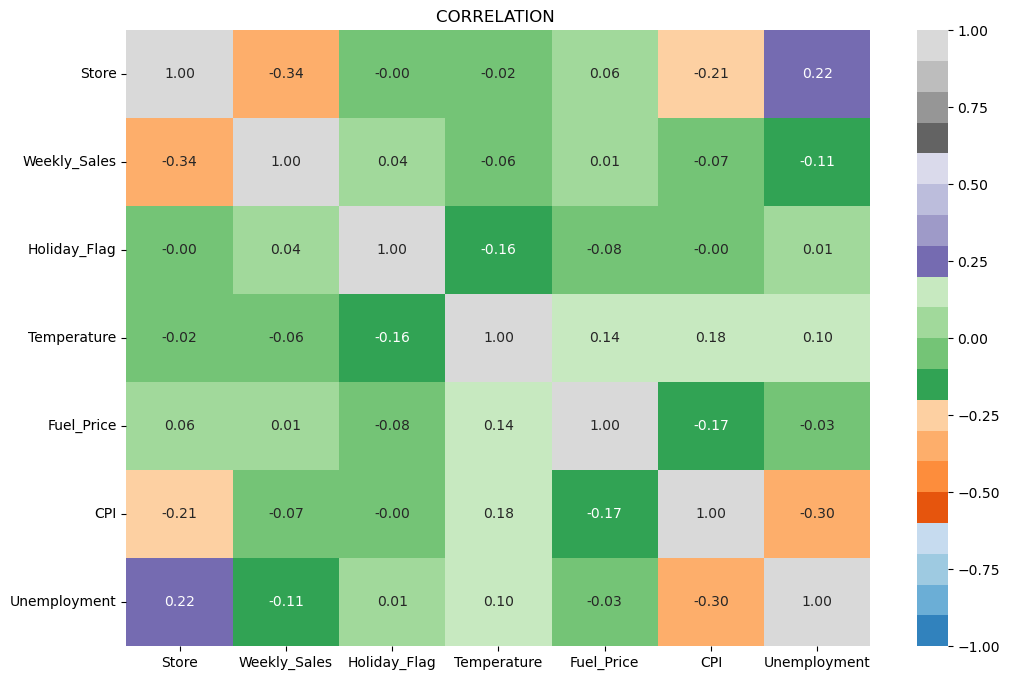

In [85]:
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='tab20c', fmt=".2f", vmin = -1, vmax = 1)
plt.title('CORRELATION ')
plt.show()